In [1]:
import pandas as pd
from semcor_bert_pipeline import *
from clustering import *

In [2]:
model = initialize_model()
tbl_results = run_pipeline('table', 'n', model)

Getting data from SEMCOR
Senses for word table.n
Getting sentences for relevant senses
Senses for word table.n
Number of sentences for sense Synset('table.n.02') 25
Number of sentences for sense Synset('table.n.01') 52
Generating BERT embeddings


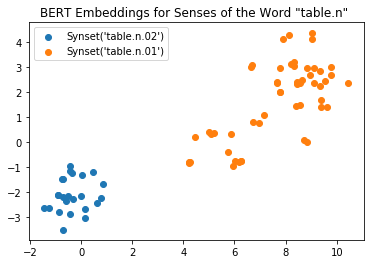

In [4]:
tsne_results = plot_embeddings(tbl_results['embeddings'],
                               tbl_results['sense_indices'], tbl_results['sense_names'], tbl_results['lemma'],
                               savefile = True)

In [6]:
color_dict = {'table.n.01': 'C0', 'table.n.02': 'C1'}
label_dict = {0:{'color': 'C0', 'label': 'table.n.01'}, 1: {'color': 'C1', 'label': 'table.n.02'}}

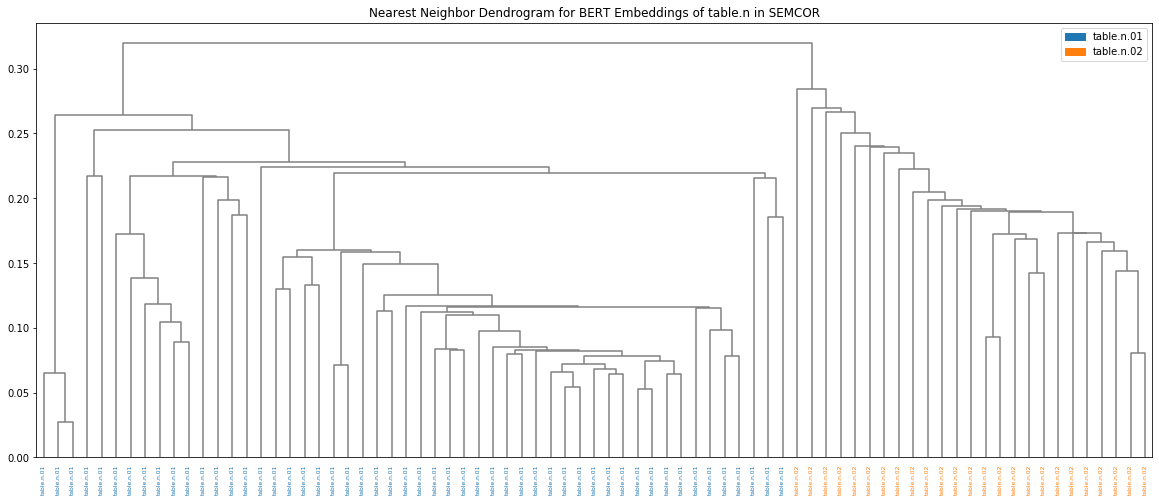

In [7]:
plot_dendrogram(tbl_results, color_dict, label_dict, savefile = True)

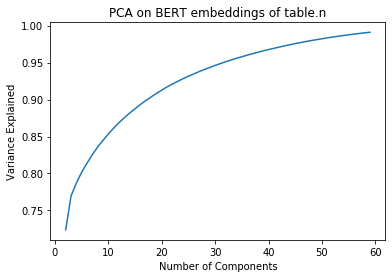

In [30]:
plot_pca_ev(range(2, 60), tbl_results['embeddings'], 'table.n')

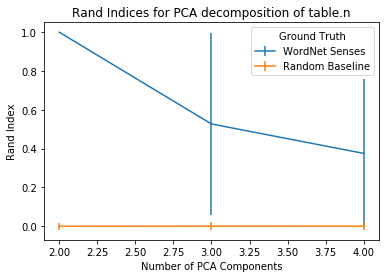

In [17]:
testing_json = plot_gmm_rand_indices_here(tbl_results, range(2, 5), savefile = True)